The basics of the Non-doinated Sorting Genetic Algorithm are http://ieeexplore.ieee.org/document/996017/

In [1]:
%matplotlib inline
#Importing required modules
import math
import numpy as np
import matplotlib.pyplot as plt

## 0. Function definition


In [3]:
P = np.array([[1,3],
              [2,5],
              [3,6],
              [3,2],
              [4,4],
              [5,1]])

### Individual class definition for the sorting function 

In [10]:
class Individual(object):
    p = []
    n = 0

    def __init__(self, p, n):
        self.p = p
        self.n = n

### $\prec$ operator
The dominance operation is usually defined mathematicaly as:
\begin{matrix}
    f_i(x^1) \leq f_i(x^2) && \text{for all } i \text{ in } i \in {1, 2, ..., k}\\
    f_i(x^1) < f_i(x^2) && \text{for at least one } i \text{ in } i \in {1, 2, ..., k}
\end{matrix}

In [4]:
def prec_operator(P,Q):
    # Dominance operator, returning True or False depending on the dominance of P and Q
    var = P.shape[0]
    # Dimensions between p and q must match
    if var != Q.shape[0]:
        raise ValueError("P and Q dimmensions don't match")
    # If all elements in P are smaller than those in Q, then P is dominating
    if np.sum(P < Q) == var:
        return True
    # Formal dominance operator
    elif np.sum(np.logical_or(P < Q, P == Q)) == var and np.sum(P < Q) >= 1: 
        return True
    else:
        return False

### $\texttt{fastNonDominatedSort}$ function 
Extracted from http://ieeexplore.ieee.org/document/996017/

In [14]:
def fastNonDominatedSort(P):
    # Number of variables of the problem
    var = P.shape[1]
    ps = P.shape[0] #possible solutions
    ind = []
    # DPareto front list
    F = []
    # Let's create an empty array for the 1st Pareto front
    F1 = np.empty((0,1), float) # The index of the point will be stored

    for i in range(ps):
        S_p = np.empty((0,1), float) # dominated solutions for each p and its domination count n_p for the solution 
        n_p = 0
        for j in range(ps):
            if prec_operator(P[i],P[j]): # If p dominates q in all variables it will be smaller in all variables
                S_p = np.append(S_p, j) # Add q to the set of solutions dominated by p
            elif prec_operator(P[j],P[i]):
                n_p += 1 # Increment the domination counter of p
        if n_p == 0: # p belongs to the first front
    #         p_rank = 1
            F1 = np.append(F1, i) #Let's include the rank after the two main variables
        ind.append(Individual(S_p, n_p))

    # Store the first frontier in the frontiers list
    F.append(F1)

    front = 0

    while len(F[front]) != 0:
        Q = np.empty((0,1), float) #use to store the members of the next front
        for i in range(F[front].size):
            for j in range(ind[int(F[front][i])].p.size):
                ind[int(ind[int(F[front][i])].p[j])].n -= 1
                if ind[int(ind[int(F[front][i])].p[j])].n == 0:
                    q_rank = front + 2
                    Q = np.append(Q, int(ind[int(F[front][i])].p[j]))
        front += 1
        F.append(Q)
        
    return F

### Examples

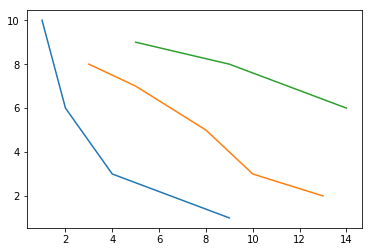

In [15]:
P = np.array([[1,10],
              [2,6],
              [3,8],
              [4,3],
              [5,7],
              [5,9],
              [8,5],
              [9,1],
              [10,3],
              [9,8],
              [13,2],
              [14,6]])

F = fastNonDominatedSort(P)

for i in range(3):
    plt.plot(P[F[i].astype(int).tolist()][:,0], P[F[i].astype(int).tolist()][:,1])